In [30]:
!pip install cvlib
import cvlib 
from cvlib.object_detection import draw_bbox, YOLO

     |████████████████████████████████| 10.0 MB 9.5 MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.6-py3-none-any.whl size=10044619 sha256=3a9518e67df955ca902b458dbc7517d32ca9b334ddcc78a709c7a9904cbeb489
  Stored in directory: /root/.cache/pip/wheels/9b/96/9b/373c07517ffe0bedbebc0813aec1e62cb2bb1dee91b3694895
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=08566bba93db1179accb06f61331f89cc939ec210495d47a29a2e3fc195a133b
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built cvlib progressbar


In [13]:
# Download the YOLOv3 model configuration, weights and labels files
# !wget https://github.com/yongminli/data/raw/main/yolov3-tiny.cfg -O yolov3-tiny.cfg
# !wget https://github.com/yongminli/data/raw/main/yolov3-tiny.weights -O yolov3-tiny.weights
# !wget https://github.com/yongminli/data/raw/main/yolov3.txt -O yolov3.txt

# !wget http://www.brunel.ac.uk/~csstyyl/tmp/yolov3.cfg -O yolov3.cfg
# !wget http://www.brunel.ac.uk/~csstyyl/tmp/yolov3.weights -O yolov3.weights
# !wget http://www.brunel.ac.uk/~csstyyl/tmp/yolov3.txt -O yolov3.txt
path = "/content/gdrive/MyDrive/image2"

# Alternatively you can save the data to your Google Drive, and load the data from there
# from google.colab import drive
# drive.mount('/content/drive')
# path = "/content/drive/My Drive/data/"


In [ ]:
# The default YOLO model files
config = path + 'yolov3.cfg'
weights = path + 'yolov3.weights'
labels = path + 'yolov3.txt'

# # Alternative the "tiny" version of YOLO, which is faster but less accurate
# config = path + 'yolov3-tiny.cfg'
# weights = path + 'yolov3-tiny.weights'
# labels = path + 'yolov3.txt'

# Construct the YOLOv3 Model
yolo = YOLO(weights, config, labels)


[INFO] Initializing YOLO ..


In [ ]:
# # Load the image files to Google Colab
# from google.colab import files
# file = files.upload()

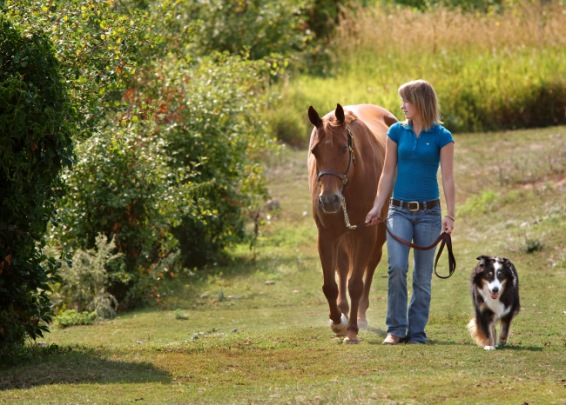

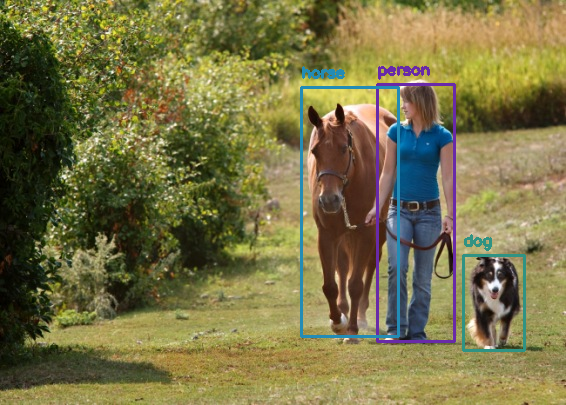

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Read an image file
img = cv2.imread(path+'objects.jpg')
# img = cv2.imread(path+'objects2.jpg')
cv2_imshow(img)
print()

# Detect objects from the image, and display the results
bbox, label, conf = yolo.detect_objects(img)
# bbox, label, conf = yolo.detect_objects(img, confidence=0.25, nms_thresh=0.2)
yolo.draw_bbox(img, bbox, label, conf)
cv2_imshow(img)

In [45]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [46]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': File exists
 Bert_Squad
'Colab Notebooks'
 Data
'Data Science A-Z.ipynb'
'Dog Vision'
'Enterprise Resource Planning Implementation.ipynb'
'How to get started with Drive.pdf'
 image
 image2
 Image_FaceDetection.ipynb
 Image_Segmentation.ipynb
'Machine Learning and Neurons.ipynb'
'My Drive'
 NLP_Bert
 NLP_SentimentAnalysis.ipynb
 projects
 sun.PNG
'TF2.0 ANN IMAGE CLASSIFICATION.ipynb'
'TF2.0 Fashion MINIST.ipynb'


In [47]:
!ls mydrive/image2/

b1.JPG	b3.JPG		   yolov3.cfg  yolov3.weights
b2.JPG	mask_rcnn_coco.h5  yolov3.txt


In [48]:
path = 'mydrive/image2/'

In [57]:
# The default YOLO model files
config = path + 'yolov3.cfg'
weights = path + 'yolov3.weights'
labels = path + 'yolov3.txt'

# # Alternative the "tiny" version of YOLO, which is faster but less accurate
# config = path + 'yolov3-tiny.cfg'
# weights = path + 'yolov3-tiny.weights'
# labels = path + 'yolov3.txt'

# Construct the YOLOv3 Model
yolo = YOLO(weights,config, labels)

[INFO] Initializing YOLO ..


error: ignored

I can not seem to get this working.  I have tried passing in config before weights but still no change.  I am going to use another file as suggested by stackoverflow"!wget "https://pjreddie.com/media/files/yolov3.weights"

##Cloning and Building Darknet
The following cells will clone darknet from AlexeyAB's famous repository, adjust the Makefile to enable OPENCV and GPU for darknet and then build darknet.

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15386, done.
remote: Total 15386 (delta 0), reused 0 (delta 0), pack-reused 15386
Receiving objects: 100% (15386/15386), 14.01 MiB | 3.31 MiB/s, done.
Resolving deltas: 100% (10346/10346), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [4]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

##Download pretrained YOLOv3 weights
YOLOv3 has been trained already on the coco dataset which has 80 classes that it can predict. We will grab these pretrained weights so that we can run YOLOv3 on these pretrained classes and get detections.

In [5]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-12-23 09:46:03--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  20.9MB/s    in 12s     

2021-12-23 09:46:16 (19.7 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [6]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

##Run Detections with Darknet and YOLOv3!

The object detector can be run using the following command

In [7]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

Darknet comes with a few images already installed in the darknet/data/ folder.

Note: After running detections OpenCV can't open the image instantly in the cloud so we must run:

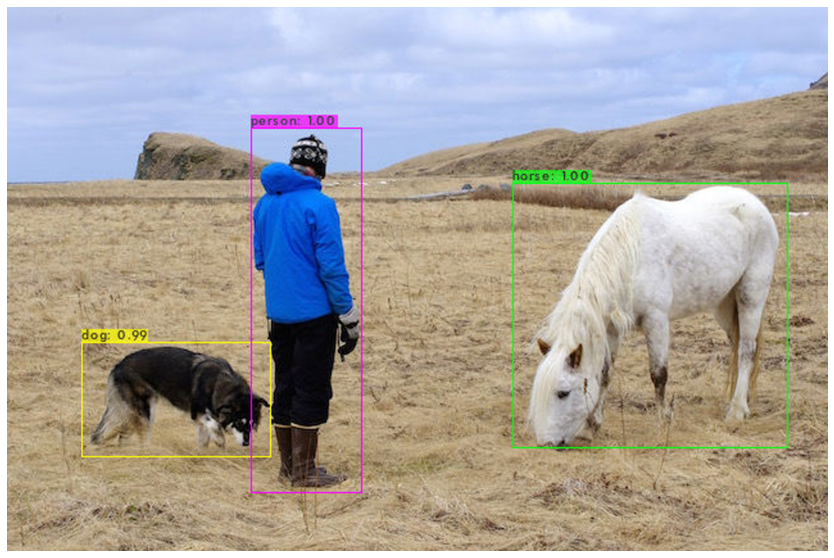

In [8]:
# show image using our helper function
imShow('predictions.jpg')

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

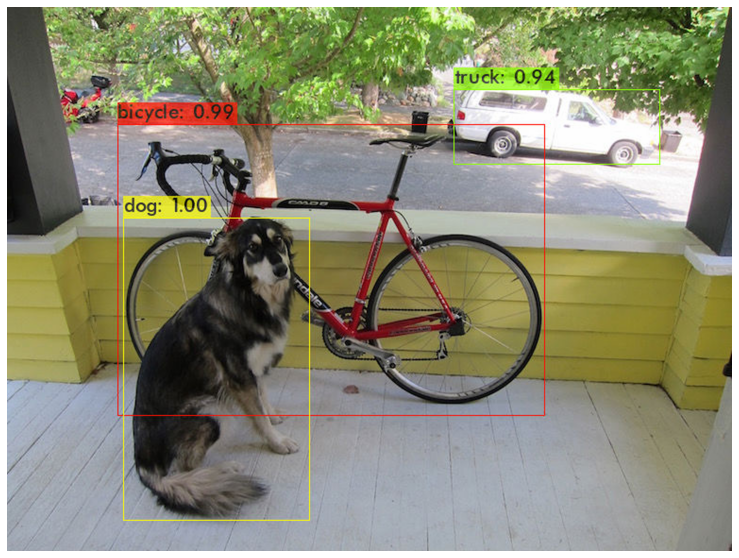

In [10]:
# look we can run another detection!
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
imShow('predictions.jpg')

## Testing the model on pictures saved on My Drive

In [18]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [19]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 Bert_Squad
'Colab Notebooks'
 Data
'Data Science A-Z.ipynb'
'Dog Vision'
'Enterprise Resource Planning Implementation.ipynb'
'How to get started with Drive.pdf'
 image
 image2
 Image_FaceDetection.ipynb
 Image_Segmentation.ipynb
'Machine Learning and Neurons.ipynb'
'My Drive'
 NLP_Bert
 NLP_SentimentAnalysis.ipynb
 projects
 sun.PNG
'TF2.0 ANN IMAGE CLASSIFICATION.ipynb'
'TF2.0 Fashion MINIST.ipynb'


/content/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Sh

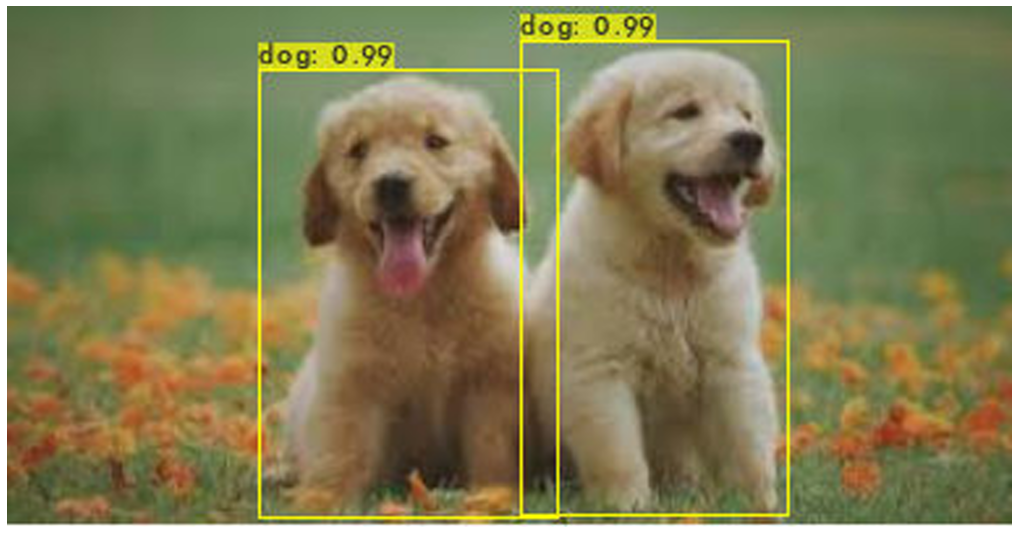

In [20]:
# run darknet command with google drive image (my image called doggies.jpg)
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /content/gdrive/MyDrive/image/doggies.PNG
imShow('predictions.jpg')

[Errno 20] Not a directory: 'darknet'
/content/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  6

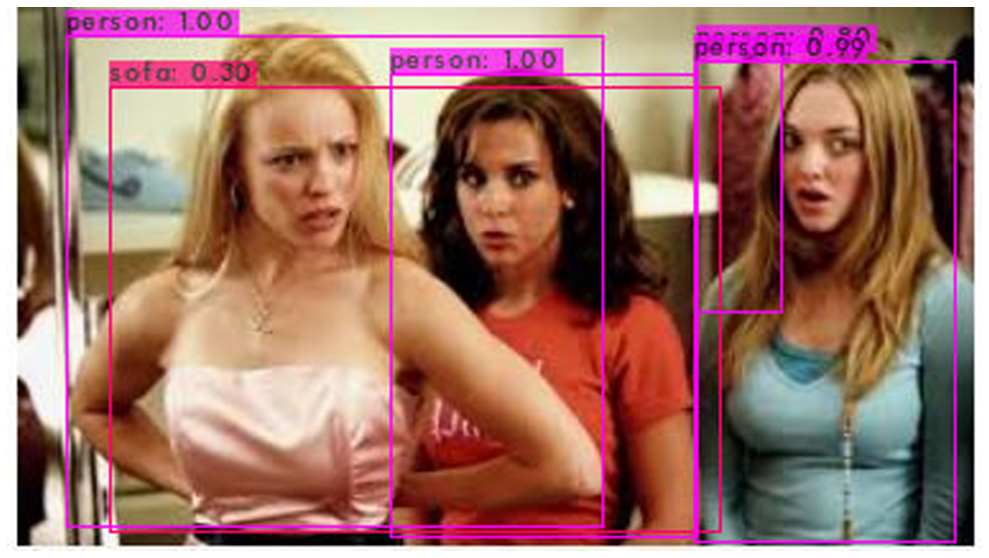

In [21]:
# run darknet command with google drive image (on my image called b2.JPG)
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /content/gdrive/MyDrive/image2/b2.JPG
imShow('predictions.jpg')

# Going to build and run detection for tiny version of Yolo.

In [35]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights


--2021-12-23 10:55:12--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  14.1MB/s    in 2.4s    

2021-12-23 10:55:16 (14.1 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



In [36]:
!ls /mydrive/

 Bert_Squad
'Colab Notebooks'
 Data
'Data Science A-Z.ipynb'
'Dog Vision'
'Enterprise Resource Planning Implementation.ipynb'
'How to get started with Drive.pdf'
 image
 image2
 Image_FaceDetection.ipynb
 Image_Segmentation.ipynb
'Machine Learning and Neurons.ipynb'
'My Drive'
 NLP_Bert
 NLP_SentimentAnalysis.ipynb
 projects
 sun.PNG
'TF2.0 ANN IMAGE CLASSIFICATION.ipynb'
'TF2.0 Fashion MINIST.ipynb'
 yolov3.weights


In [28]:
path = "/content/gdrive/MyDrive/image2/"

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256   

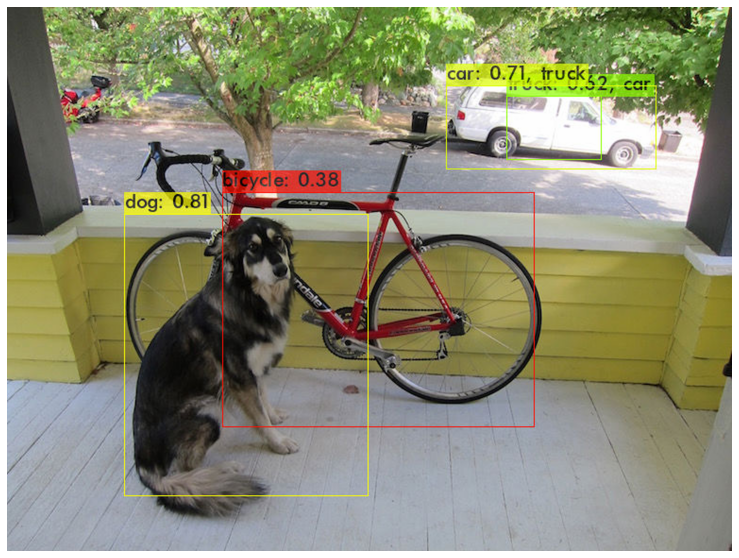

In [39]:
!./darknet detect cfg/yolov3-tiny.cfg yolov3-tiny.weights data/dog.jpg
imShow('predictions.jpg')

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256   

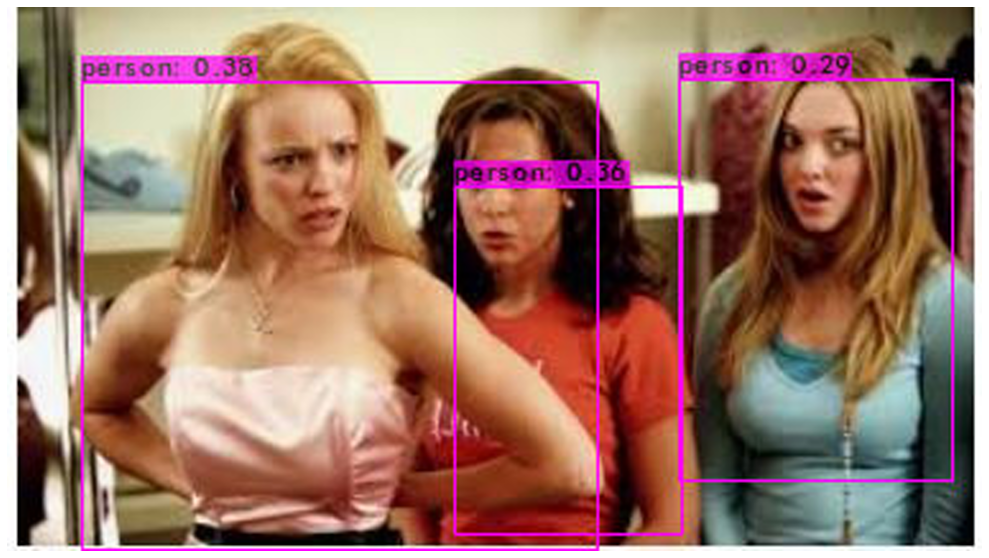

In [40]:
!./darknet detect cfg/yolov3-tiny.cfg yolov3-tiny.weights /content/gdrive/MyDrive/image2/b2.JPG
imShow('predictions.jpg')

# Conclusion
In the full version of Yolo, it was able to detect mutiple objoects and identify locations on the image.  As seenon the object test we had probablities of 0.99 and 1.  Prediction time was fast at about 94 milliseconds(+- a few milliseconds).  The "yolo tiny" version was much quicker but less accurate ranging between 29% to 38 % for the tiny and in the full version above 90%.  This may be becuase the tiny version only uses two layers for detect( layers 16 and 23) where as the full version used 3 layers.  